# SVM実装



In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import layers
from layers import decisionregionplotfunction as drp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


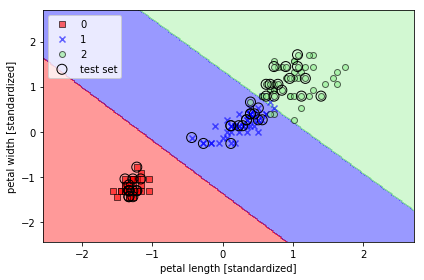

In [2]:
#線形のみOK（スラック変数あり）
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

sc=StandardScaler()
sc.fit(x_train)

x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

svm=SVC(kernel='linear',C=1.0,random_state=1)

svm.fit(x_train_std,y_train)

x_combined_std=np.vstack((x_train_std,x_test_std))
y_combined=np.hstack((y_train,y_test))

drp.plot_decision_regions(x=x_combined_std,y=y_combined,classifier=svm,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


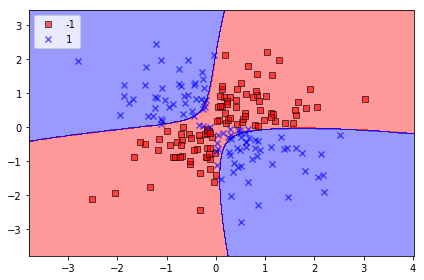

In [3]:
#カーネルトリック

svm=SVC(kernel='rbf',random_state=1,gamma=0.1,C=10.0)
np.random.seed(1)
x_xor=np.random.randn(200,2)
y_xor=np.logical_xor(x_xor[:,0]>0,x_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
X,Y=x_xor,y_xor
svm.fit(X,Y)
drp.plot_decision_regions(X,Y,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


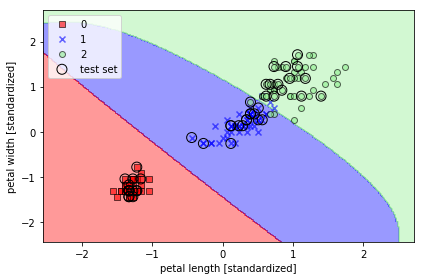

In [4]:
#カーネル関数のカットオフパラメータの影響をIris dataで見てみる
svm=SVC(kernel='rbf',random_state=1,gamma=0.2,C=1.0)
svm.fit(x_train_std,y_train)

drp.plot_decision_regions(x_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


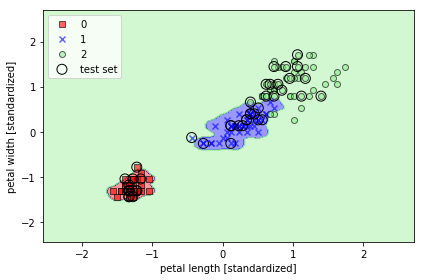

In [5]:
#カットオフパラメータが大きいとき
svm=SVC(kernel='rbf',random_state=1,gamma=100.0,C=1.0)
svm.fit(x_train_std,y_train)

drp.plot_decision_regions(x_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
